# <center>Loan Approval Predition -HDMA Data-</center>
The Home Mortgage Disclosure Act (HMDA) requires many financial institutions to maintain, report, and publicly disclose information about mortgages. These public data are important because they help show whether lenders are serving the housing needs of their communities; they give public officials information that helps them make decisions and policies; and they shed light on lending patterns that could be discriminatory.

> Inside this data set contains 466,566 observations of Washington State home loans - variables include; demographic information, area specific data, loan status, property type, loan type, loan purpose and originating agency. To get more information about -and download- the dataset, click [here](https://www.kaggle.com/miker400/washington-state-home-mortgage-hdma2016)


### Goals
 - Build a Machine learning model to predict whether a loan gets `approved` or `not` based on the various features provided by the dataset
 
 
The video in the code cell below gives us more insight about the data

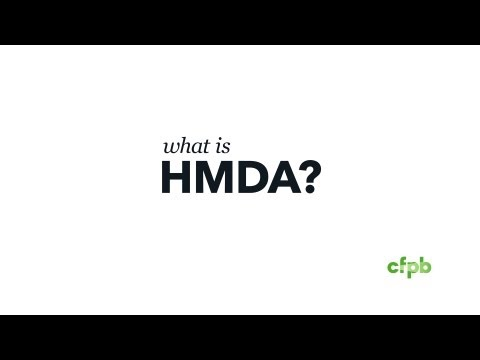

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('wR9Tsdqgmuk',700,400)

#### Import and Explore the data

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Washington_State_HDMA-2016.csv')
df.head()

C:\Users\timmy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (23,24,25,28,29,30,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466566 entries, 0 to 466565
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   tract_to_msamd_income           465951 non-null  float64
 1   rate_spread                     8638 non-null    float64
 2   population                      465956 non-null  float64
 3   minority_population             465956 non-null  float64
 4   number_of_owner_occupied_units  465944 non-null  float64
 5   number_of_1_to_4_family_units   465955 non-null  float64
 6   loan_amount_000s                466566 non-null  int64  
 7   hud_median_family_income        465960 non-null  float64
 8   applicant_income_000s           404533 non-null  float64
 9   state_name                      466566 non-null  object 
 10  state_abbr                      466566 non-null  object 
 11  sequence_number                 466566 non-null  int64  
 12  respondent_id   

A quick overview of the dataset in the code cells above shows:
- various columns describing the `loan`, `lender`, `applicant`, `property to be acquired`
- there are lots of columns with missing values
- there are both numerical and categorical data present in the dataset

# <center>Inspect, Decribe and Select Columns</center>
In the following code cells, let's try to make sense of the various colums present in the data
> This aspect needs a lot of research, so that we can familiarize with the data and then take decisions that would help clean and get the data ready for analysis

The column names are descriptive to an extent, but a visit to the [HDMA Glossary](https://www.ffiec.gov/hmda/glossary.htm) is needed so as to understand the meaning of some acronymns(`msamd`,`hoepa`) used.

In [5]:
# inspect the target_column
df['action_taken_name'].unique()

array(['Loan originated', 'Application approved but not accepted',
       'Application denied by financial institution',
       'Application withdrawn by applicant',
       'File closed for incompleteness',
       'Loan purchased by the institution',
       'Preapproval request denied by financial institution',
       'Preapproval request approved but not accepted'], dtype=object)

`Loan originated` is a widely used term in finance , it means the loan application has been approved. We will remove the rows where the applicant has` withdrawn the request for loan`. Loan purchased means that the lender bought the loan on a secondary market.

**What is a secondary market ?**

>It happens quite often that after lending the loan , the lender sells the loan and servicing rights to an investor in the secondary market.You might be thinking what is the need of a secondary market.

>When a person takes out a home loan, the loan is underwritten, funded and serviced by a bank. Because the bank has used their own funds to make the loan, they will eventually run out of money to loan, so they will sell the loan to the secondary market to replenish their money available to make more home loans.

Since our analysis only concerns the primary market where borrowers and lenders are involved:
- remove the rows where the `applicant has withdrawn the request for loan`.
- remove the rows where the action taken is `"Loan purchased by financial institution"`.

In [6]:
df=df[df['action_taken_name']!='Application withdrawn by applicant']
df=df[df['action_taken_name']!='Loan purchased by the institution']

After 'indepth' research, the following columns(shown in the following code cell) were selected based on:
- their relevance to the present analysis
- the number of `non-null` values present

In [7]:
columns_to_use = ['loan_amount_000s', 'applicant_income_000s', 'purchaser_type_name', 'property_type_name', 'owner_occupancy_name', 'msamd_name','loan_type_name','loan_purpose_name','lien_status_name','hoepa_status_name','county_name','co_applicant_sex_name','applicant_sex_name','applicant_race_name_1','agency_name','action_taken_name']

In [8]:
df_new = df[columns_to_use]
df_new.shape

(357852, 16)

In [9]:
df_new.isnull().sum()

loan_amount_000s             0
applicant_income_000s    31380
purchaser_type_name          0
property_type_name           0
owner_occupancy_name         0
msamd_name               29128
loan_type_name               0
loan_purpose_name            0
lien_status_name             0
hoepa_status_name            0
county_name                209
co_applicant_sex_name        0
applicant_sex_name           0
applicant_race_name_1        0
agency_name                  0
action_taken_name            0
dtype: int64

In [10]:
#remove rows where there are missing values in applicant_income_000s
df_clean = df_new.dropna(subset=['applicant_income_000s', 'msamd_name'])
df_clean.isnull().sum()

loan_amount_000s         0
applicant_income_000s    0
purchaser_type_name      0
property_type_name       0
owner_occupancy_name     0
msamd_name               0
loan_type_name           0
loan_purpose_name        0
lien_status_name         0
hoepa_status_name        0
county_name              0
co_applicant_sex_name    0
applicant_sex_name       0
applicant_race_name_1    0
agency_name              0
action_taken_name        0
dtype: int64

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300187 entries, 0 to 466565
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amount_000s       300187 non-null  int64  
 1   applicant_income_000s  300187 non-null  float64
 2   purchaser_type_name    300187 non-null  object 
 3   property_type_name     300187 non-null  object 
 4   owner_occupancy_name   300187 non-null  object 
 5   msamd_name             300187 non-null  object 
 6   loan_type_name         300187 non-null  object 
 7   loan_purpose_name      300187 non-null  object 
 8   lien_status_name       300187 non-null  object 
 9   hoepa_status_name      300187 non-null  object 
 10  county_name            300187 non-null  object 
 11  co_applicant_sex_name  300187 non-null  object 
 12  applicant_sex_name     300187 non-null  object 
 13  applicant_race_name_1  300187 non-null  object 
 14  agency_name            300187 non-nu

- categorize `loan_amount` column into `small, medium and large`
- categorize `applicant_income_000s` column into `low, medium and high`
- make `action_taken_name` column of 2 categories (approved, not_approved)

In [12]:
# take a closer look at the numerical columns so as select intervals to categorize with
df_new.describe()

,loan_amount_000s,applicant_income_000s
count,357852.000000,326472.000000
mean,299.300135,112.945842
std,756.522512,124.632423
min,1.000000,1.000000
25%,170.000000,60.000000
50%,247.000000,89.000000
75%,350.000000,134.000000
max,99999.000000,9999.000000


In [13]:
df_clean['applicant_income_range'] = pd.cut(df_clean['applicant_income_000s'],bins=[0,100,200,9999],labels=['low', 'medium','high'])
df_clean['applicant_income_range'].value_counts()

<ipython-input-13-93dbd624b46c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['applicant_income_range'] = pd.cut(df_clean['applicant_income_000s'],bins=[0,100,200,9999],labels=['low', 'medium','high'])


low       170978
medium    100571
high       28638
Name: applicant_income_range, dtype: int64

In [14]:
df_clean['loan_amount_range'] = pd.cut(df_clean.loan_amount_000s,bins=[0,100,200,99999],labels=['small', 'medium','large'])
df_clean['loan_amount_range'].value_counts()

<ipython-input-14-4f9573bc4b42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['loan_amount_range'] = pd.cut(df_clean.loan_amount_000s,bins=[0,100,200,99999],labels=['small', 'medium','large'])


large     201701
medium     73092
small      25394
Name: loan_amount_range, dtype: int64

### make `action_taken_name` column of 2 categories (approved, not_approved)

In [15]:
df_clean['action_taken_name'].unique()

array(['Loan originated', 'Application approved but not accepted',
       'Application denied by financial institution',
       'File closed for incompleteness',
       'Preapproval request approved but not accepted',
       'Preapproval request denied by financial institution'],
      dtype=object)

In [16]:
df_clean.loc[df_clean['action_taken_name']=='Loan originated','action_taken_name'] = 'approved'

fix = df_clean['action_taken_name'].unique()[1:]
for col in fix:
    df_clean.loc[df_clean['action_taken_name']==col,'action_taken_name'] = 'not approved'
    
    
df_clean['action_taken_name'].unique()

C:\Users\timmy\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


array(['approved', 'not approved'], dtype=object)

In [17]:
df_clean = df_clean.drop(['loan_amount_000s', 'applicant_income_000s'], axis=1)
df_clean.isnull().sum()

purchaser_type_name       0
property_type_name        0
owner_occupancy_name      0
msamd_name                0
loan_type_name            0
loan_purpose_name         0
lien_status_name          0
hoepa_status_name         0
county_name               0
co_applicant_sex_name     0
applicant_sex_name        0
applicant_race_name_1     0
agency_name               0
action_taken_name         0
applicant_income_range    0
loan_amount_range         0
dtype: int64

In [18]:
# display each columns and the number of categories present in it
no_uniq_vals = {}
for col in df_clean.columns:
    no_uniq_vals[col] = len(df_clean[col].unique())
    
no_uniq_vals

{'purchaser_type_name': 10,
 'property_type_name': 2,
 'owner_occupancy_name': 3,
 'msamd_name': 14,
 'loan_type_name': 4,
 'loan_purpose_name': 3,
 'lien_status_name': 3,
 'hoepa_status_name': 2,
 'county_name': 21,
 'co_applicant_sex_name': 5,
 'applicant_sex_name': 4,
 'applicant_race_name_1': 7,
 'agency_name': 6,
 'action_taken_name': 2,
 'applicant_income_range': 3,
 'loan_amount_range': 3}

## <center>Engineer Features and Build Model</center>
In the following code cells:
- the dataset is split into train and test sets (ratio 75:25)
- the labels(features/inputs) columns are encoded using the `sklearn ordinal encoder`
- the target column is encoded using the `sklearn label encoder`
- the model(classification) is trained on the RandonForest ensemble algorithm
- the f1 score is used to measure it's accuracy

In [19]:
feature_cols = [col for col in df_clean.columns if col!='action_taken_name']
x = df_clean[feature_cols]
y = df_clean['action_taken_name']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (225140, 15) (225140,)
Test (75047, 15) (75047,)


In [21]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc


def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [22]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_enc, y_train_enc)

prediction = rf.predict(X_test_enc)
print('Model Accuracy%: ',f1_score(y_test_enc, prediction)*100)

Model Accuracy%:  78.6988837956129


# References
Below are some useful links that guided some of my decisions through the course of the analysis

- [HDMA Glossary](https://www.ffiec.gov/hmda/glossary.htm)
- [which ML model to use?](https://towardsdatascience.com/which-machine-learning-model-to-use-db5fdf37f3dd)
- [perform feature selection with categorical data](https://machinelearningmastery.com/feature-selection-with-categorical-data/)